In [8]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digital_videogames_df = pd.read_pickle('digital_videogames_df_topics.pkl')

In [3]:
digital_videogames_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_body_clean,review_language,sentiment,Topic,Topic_Name
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31,i keep buying madden every year hoping they ge...,en,negative,0,Gameplay/Graphics
1,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31,if you are prepping for the end of the world t...,en,positive,0,Gameplay/Graphics
2,US,38426028,R1LRYU1V0T3O38,B00S00IJH8,215163395,Sims 4,Digital_Video_Games,4,0,0,N,Y,i like the new skills like herbalism in this,"i like the new skills like herbalism in this, ...",2015-08-31,i like the new skills like herbalism in this ...,en,positive,4,Game Challenge
3,US,20715661,R2TX1KLPXXXNYS,B00K59HKIQ,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Easy & Fast,"Excellent, fast and secure!!!",2015-08-31,excellent fast and secure,en,positive,3,Ease/Speed of Transaction
4,US,8926809,R3B3UHK1FO0ERS,B004774IPU,151985175,Sid Meier's Civilization V,Digital_Video_Games,1,0,0,N,N,I am still playing Civ 4 and love it. It's a s...,"As has been written by so many others, I quick...",2015-08-31,as has been written by so many others i quick...,en,negative,0,Gameplay/Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116090,US,40583756,R3V7BTATZVG5SO,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,2,2,N,N,Should have ordered the disc.,I am now downloading this game for the third t...,2008-12-28,i am now downloading this game for the third t...,en,negative,2,Game Download/Installation
116091,US,53011810,R2G7DI8NYXZB5R,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,4,2,3,N,N,Worked first try for me,"I was worried due to the 2 reviews I saw here,...",2008-12-25,i was worried due to the reviews i saw here ...,en,positive,7,Compatibility
116092,US,53094564,R3QRKP4DS759BP,B001AU6TQ8,801870836,Crazy Machines 1 - The Wacky Contraptions Game...,Digital_Video_Games,1,13,16,N,N,"The Software May be Great, But I'll Never Know",I downloaded this as a Christmas present for m...,2008-12-24,i downloaded this as a christmas present for m...,en,negative,2,Game Download/Installation
116093,US,18614365,R13OA3TRCM8IBM,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,20,22,N,N,Do Not Download This!,I downloaded this for my son's birthday yester...,2008-09-01,i downloaded this for my son s birthday yester...,en,negative,7,Compatibility


In [4]:
sentiments_df = pd.DataFrame(digital_videogames_df.sentiment.value_counts()).rename(columns={'sentiment':'totals'})

In [6]:
sentiments_df['percentages'] = digital_videogames_df.sentiment.value_counts(normalize=True)

In [7]:
sentiments_df

,totals,percentages
positive,84901,0.731306
negative,31194,0.268694


In [10]:
sentiments_df.totals

positive    84901
negative    31194
Name: totals, dtype: int64

In [16]:
sentiments_df.index

Index(['positive', 'negative'], dtype='object')

<BarContainer object of 2 artists>

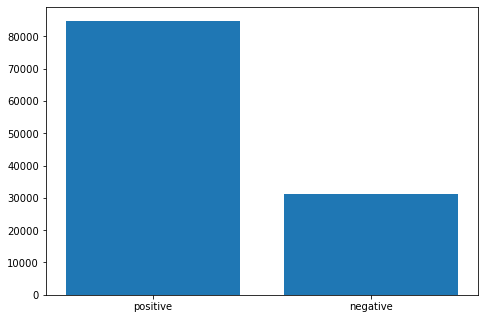

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sentiments_df.index, sentiments_df.totals)

In [30]:
digital_videogames_df.loc[digital_videogames_df['sentiment']=='positive']['Topic_Name'].value_counts()

Gameplay/Graphics             33236
Product Delivery              14626
Game Challenge                10570
Good Price                    10112
Ease/Speed of Transaction      6014
Game Download/Installation     5777
Compatibility                  2456
Waste of Money                 2110
Name: Topic_Name, dtype: int64

In [31]:
digital_videogames_df.loc[digital_videogames_df['sentiment']=='negative']['Topic_Name'].value_counts()

Gameplay/Graphics             11875
Game Download/Installation     5983
Compatibility                  4666
Waste of Money                 4118
Product Delivery               2519
Game Challenge                  935
Good Price                      722
Ease/Speed of Transaction       376
Name: Topic_Name, dtype: int64

In [35]:
digital_videogames_df['Topic_Name'].value_counts()

Gameplay/Graphics             45111
Product Delivery              17145
Game Download/Installation    11760
Game Challenge                11505
Good Price                    10834
Compatibility                  7122
Ease/Speed of Transaction      6390
Waste of Money                 6228
Name: Topic_Name, dtype: int64

In [41]:
topic_sentiments_df = pd.DataFrame(digital_videogames_df['Topic_Name'].value_counts()).rename(columns={'Topic_Name':'Totals'})

In [49]:
topic_sentiments_df['Positives'] = digital_videogames_df.loc[digital_videogames_df['sentiment']=='positive']['Topic_Name'].value_counts()
topic_sentiments_df['Positive_Pctg'] = topic_sentiments_df['Positives']/topic_sentiments_df['Totals']
topic_sentiments_df['Negatives'] = digital_videogames_df.loc[digital_videogames_df['sentiment']=='negative']['Topic_Name'].value_counts()
topic_sentiments_df['Negative_Pctg'] = topic_sentiments_df['Negatives']/topic_sentiments_df['Totals']

In [54]:
topic_sentiments_df['Positive_Pctg']

Gameplay/Graphics             0.736760
Product Delivery              0.853077
Game Download/Installation    0.491241
Game Challenge                0.918731
Good Price                    0.933358
Compatibility                 0.344847
Ease/Speed of Transaction     0.941158
Waste of Money                0.338793
Name: Positive_Pctg, dtype: float64

In [51]:
topic_sentiments_df

,Totals,Positives,Negatives,Positive_Pctg,Negative_Pctg
Gameplay/Graphics,45111,33236,11875,0.736760,0.263240
Product Delivery,17145,14626,2519,0.853077,0.146923
Game Download/Installation,11760,5777,5983,0.491241,0.508759
Game Challenge,11505,10570,935,0.918731,0.081269
Good Price,10834,10112,722,0.933358,0.066642
Compatibility,7122,2456,4666,0.344847,0.655153
Ease/Speed of Transaction,6390,6014,376,0.941158,0.058842
Waste of Money,6228,2110,4118,0.338793,0.661207


In [65]:
topic_sentiments_df_positive = pd.DataFrame(topic_sentiments_df['Positive_Pctg']).sort_values(by='Positive_Pctg', ascending=False)

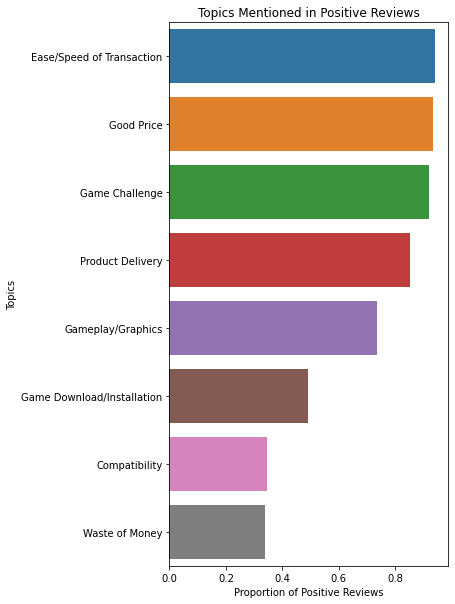

In [448]:
fig,ax = plt.subplots(figsize=(5,10))

sns.barplot(y=topic_sentiments_df_positive.index, x=topic_sentiments_df_positive['Positive_Pctg'])
plt.xlabel('Proportion of Positive Reviews')
plt.ylabel('Topics')
plt.title('Topics Mentioned in Positive Reviews')
plt.savefig('positive_reviews_topics')

In [67]:
topic_sentiments_df_negative = pd.DataFrame(topic_sentiments_df['Negative_Pctg']).sort_values(by='Negative_Pctg', ascending=False)

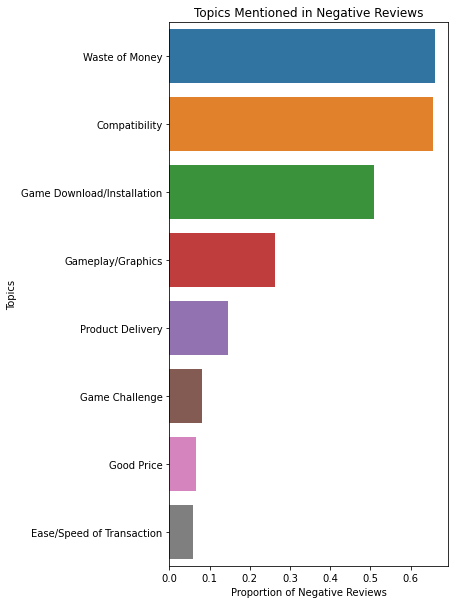

In [449]:
fig,ax = plt.subplots(figsize=(5,10))

sns.barplot(y=topic_sentiments_df_negative.index, x=topic_sentiments_df_negative['Negative_Pctg'])
plt.xlabel('Proportion of Negative Reviews')
plt.ylabel('Topics')
plt.title('Topics Mentioned in Negative Reviews')
plt.savefig('negative_reviews_topics')

In [73]:
digital_videogames_df.product_title.value_counts().head(20)

Playstation Network Card                                          8296
Xbox Live Subscription                                            5966
Playstation Plus Subscription                                     3189
SimCity - Limited Edition                                         3179
Xbox 360 Live Points Card                                         2788
Xbox Live Gift Card                                               2119
Battlefield 4                                                     1158
Final Fantasy XIV: A Realm Reborn                                 1047
Battlefield 3                                                     1014
Tomb Raider                                                        741
Dark Souls: Prepare To Die Edition [Online Game Code]              718
Command and Conquer The Ultimate Collection [Online Game Code]     699
Borderlands 2                                                      635
Sid Meier's Civilization V                                         568
BioSho

In [81]:
negative_reviews_df = digital_videogames_df.loc[digital_videogames_df['sentiment']=='negative']
positive_reviews_df = digital_videogames_df.loc[digital_videogames_df['sentiment']=='positive']

In [121]:
total_neg_reviews_product = pd.DataFrame(digital_videogames_df[digital_videogames_df['sentiment']=='negative'].product_title.value_counts().reset_index().values, columns=['product_title', 'total_neg_reviews'])

In [122]:
total_pos_reviews_product = pd.DataFrame(digital_videogames_df[digital_videogames_df['sentiment']=='positive'].product_title.value_counts().reset_index().values, columns=['product_title', 'total_pos_reviews'])

In [194]:
products_df = pd.DataFrame(digital_videogames_df.product_title.value_counts().reset_index().values, columns=["product_title", "total_reviews"])

In [195]:
product_df = pd.merge(pd.merge(product_df,total_neg_reviews_product, on='product_title', how='outer'),total_neg_reviews_product, on='product_title', how='outer')
product_df = product_df.drop(columns=['total_neg_reviews_y']).rename(columns={'total_neg_reviews_x':'total_neg_reviews'})

In [196]:
product_df = product_df.loc[:,~product_df.columns.duplicated()]

In [197]:
for col in list(product_df.columns[1:]):
    product_df[col] = pd.to_numeric(product_df[col])

In [200]:
product_df.dtypes

product_title         object
total_pos_reviews    float64
total_reviews          int64
total_neg_reviews    float64
dtype: object

In [201]:
product_df.head()

,product_title,total_pos_reviews,total_reviews,total_neg_reviews
0,Playstation Network Card,7492.0,8296,804.0
1,Xbox Live Subscription,5555.0,5966,411.0
2,Playstation Plus Subscription,2931.0,3189,258.0
3,Xbox 360 Live Points Card,2554.0,2788,234.0
4,Xbox Live Gift Card,1844.0,2119,275.0


In [203]:
product_df['neg_review_pctg'] = product_df['total_neg_reviews']/product_df['total_reviews']
product_df['pos_review_pctg'] = product_df['total_pos_reviews']/product_df['total_reviews']

In [212]:
product_df.fillna(0,inplace=True)

In [230]:
highest_pos_pctg = product_df[['product_title', 'pos_review_pctg', 'total_reviews']].sort_values(by='total_reviews', ascending=False)[:20].sort_values(by='pos_review_pctg',ascending=False)
highest_neg_pctg = product_df[['product_title', 'neg_review_pctg', 'total_reviews']].sort_values(by='total_reviews', ascending=False)[:20].sort_values(by='neg_review_pctg',ascending=False)

##### Product with Highest Proportion of Postive Reviews:
Bioshock Triple Pack (Pos Review Pct: 96.36%)

##### Product with Highest Proportion of Negative Reviews:
SimCity - Limited Edition (Neg Review Pct: 83.71%)

In [232]:
highest_pos_pctg.head(5)

,product_title,pos_review_pctg,total_reviews
11,Bioshock Triple Pack [Online Game Code],0.963570,549
10,Borderlands 2,0.938583,635
1,Xbox Live Subscription,0.931110,5966
15,Bioshock Dual Pack [Online Game Code],0.927984,486
2,Playstation Plus Subscription,0.919097,3189


In [233]:
highest_neg_pctg.head(5)

,product_title,neg_review_pctg,total_reviews
12,SimCity - Limited Edition,0.837056,3179
23,Sid Meier's Civilization V,0.426056,568
6,Battlefield 4,0.390328,1158
16,Command and Conquer The Ultimate Collection [O...,0.387697,699
8,Battlefield 3,0.367850,1014


In [248]:
simcity_neg_reviews = list(digital_videogames_df.loc[(digital_videogames_df.product_title=='SimCity - Limited Edition') & (digital_videogames_df.sentiment=='negative')]['review_body_clean'])

In [243]:
bioshock_pos_reviews = list(digital_videogames_df.loc[(digital_videogames_df.product_title=='Bioshock Triple Pack [Online Game Code]') & (digital_videogames_df.sentiment=='positive')]['review_body_clean'])

In [432]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
blockerwords = ['br', 'like', 'really', 'also', 'much', 'well', 'recommend', 'good', 'many', 'plus', 
                'hours', 'love', 'lot', 'well', 'great', 'first', 'two', 'ever', 'thing', 'one', 
               'xbox', 'live', 'psn', 'time', 'new', 'even', 'still', 'way', 'could', 'go', 'back',
               'even', 'want', 'game', 'games', 'would', 'better', 'play', 'played', 'playing', 'best',
               'get', 'got', 'little', 'make', 'find', 'product', 'amazon', 'awesome', 'far', ' ', 
                'simcity', 'bioshock', 'city', 'cities', 'infinite', 'amazing','already','alone', 'never',
               'yet', 'rapture', 'say','fantastic','another','always','able','sim', 'buy','small',
               'going','since', 'definitely', 'around']
stopwords.extend(blockerwords)

In [433]:
from gensim.utils import simple_preprocess
# def word_list(sentences):
#     for sentence in sentences:
#         yield(simple_preprocess(str(sentence), deacc=True))

def clean_text(text):
    text_list = simple_preprocess(str(text), deacc=True)
    return [word for word in text_list if word not in stopwords and len(word)>2]

def list_of_reviews_cleaner(review_list):
    return [clean_text(review) for review in review_list]

In [434]:
neg_review_list_of_lists = list_of_reviews_cleaner(simcity_neg_reviews)
pos_review_list_of_lists = list_of_reviews_cleaner(bioshock_pos_reviews)

In [435]:
import itertools
simcity_neg_big_list = list(itertools.chain.from_iterable(neg_review_list_of_lists))
bioshock_pos_big_list = list(itertools.chain.from_iterable(pos_review_list_of_lists))

In [436]:
from nltk.probability import FreqDist

In [437]:
simcity_neg_freq = FreqDist(simcity_neg_big_list)
bioshock_pos_freq = FreqDist(bioshock_pos_big_list)

In [438]:
simcity_neg_24 = simcity_neg_freq.most_common(24)

In [439]:
bioshock_pos_24 = bioshock_pos_freq.most_common(24)

In [440]:
def setlist_dictionary_converter(setlist):
    return {word:freq for word,freq in setlist}

In [441]:
simcity_neg_24_dict = setlist_dictionary_converter(simcity_neg_24)

bioshock_pos_24_dict = setlist_dictionary_converter(bioshock_pos_24)

In [442]:
from wordcloud import WordCloud

simcity_wordcloud = WordCloud(colormap='Dark2', background_color='white').generate_from_frequencies(simcity_neg_24_dict)
bioshock_wordcloud = WordCloud(colormap='Dark2', background_color='white').generate_from_frequencies(bioshock_pos_24_dict)

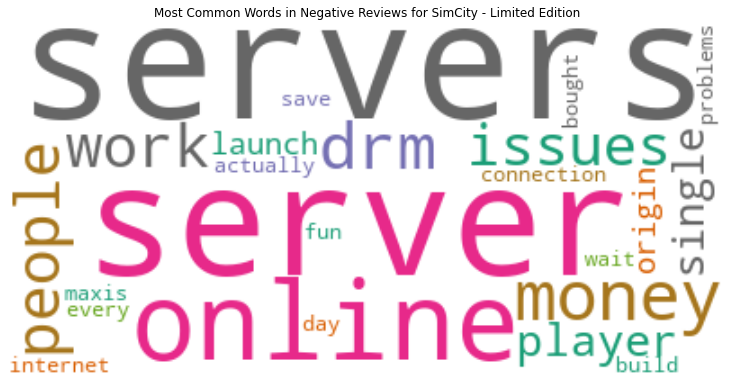

In [445]:
plt.figure(figsize=(10, 5))
plt.imshow(simcity_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most Common Words in Negative Reviews for SimCity - Limited Edition')
plt.savefig('neg_review_words_simcity')
plt.show()

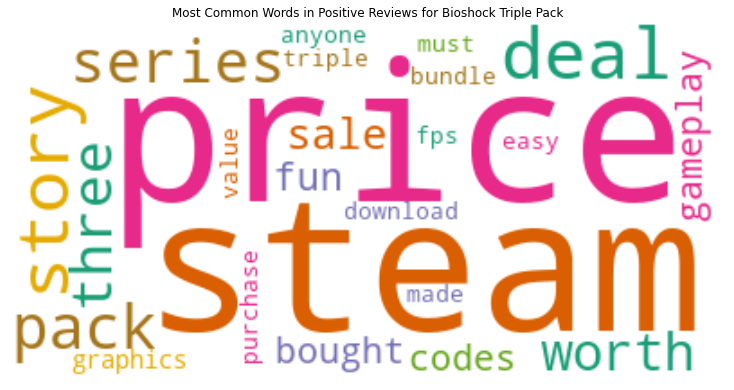

In [446]:
plt.figure(figsize=(10, 5))
plt.imshow(bioshock_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most Common Words in Positive Reviews for Bioshock Triple Pack')
plt.savefig('pos_review_words_bioshock')
plt.show()